<a href="https://colab.research.google.com/github/fredericpoitevin/TIPE_Louis/blob/main/TIPE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

On a 3 variables temporelles qui dependent les unes des autres: $y$, $\lambda$ et $\alpha$, plus une variable externe dont elles dependent $y_B$.

On part du systeme suivant (tes notes), et on veut le reecrire sous la forme explicite d'un systeme d'equadiff couplees. Pour faire simple, on va essayer de n'ecrire que des equadiff du premier ordre. Pour ca on utilise une petite astuce en introduisant une 4eme variable: $v = \dot y$. Je ne note que la dependence a la fonction, mais c'est sous-entendu qu'on peut aussi dependre des derivees premieres.

$(1)\ \dot{y} = f_{y}(y, v, y_B, \gamma, \alpha)$

$(2)\ \dot{v} = f_{v}(y, v, y_B, \gamma, \alpha)$

$(3)\ \dot{y_B} = f_{v_B}(y, v, y_B, \gamma, \alpha)$

$(4)\ \dot{\gamma} = f_{\gamma}(y, v, y_B, \gamma, \alpha)$

$(5)\ \dot{\alpha} = f_{\alpha}(y, v, y_B, \gamma, \alpha)$


En pratique, les fonctions $f$ ne dependent pas de toutes les 5 variables a chaque fois, mais c'est juste pour illustrer l'idee.

Par exemple, on peut facilement simplifier (1) et (3). Les autres sont un peu plus complexes. Il faudra les reverifier, mais il me semble que ca donne:

$(1)\ f_{y}(y, v, y_B, \gamma, \alpha) = v$

$(2)\ f_{v}(y, v, y_B, \gamma, \alpha) = \frac{1}{m}\Big[\Big(\frac{a+b}{a+h\tan{\alpha}}\Big)\big((k-c\dot\alpha\tan{(\alpha+\beta)})\gamma+\dot\gamma\big) - mg\Big]$

$(3)\ f_{y_B}(y, v, y_B, \gamma, \alpha) = v_B$

$(4)\ f_{\gamma}(y, v, y_B, \gamma, \alpha) = -v_{B} + \dot\alpha\big(c\cos{\alpha} - h\sin{\alpha}\big)$

$(5)\ f_{\alpha}(y, v, y_B, \gamma, \alpha) = \frac{v}{a\cos{\alpha} - h\sin{\alpha}}$

Comme on a un systeme d'equations du premier ordre, on peut utiliser la librairie `odeint`

In [1]:
import numpy as np
from scipy.integrate import odeint
from scipy.misc import derivative

In [20]:
def dalphadt(v,alpha,a,h):
  return v/(a*np.cos(alpha) - h*np.sin(alpha))

def dgammadt(v,vB,alpha,a,c,h):
  return -vB + (c*np.cos(alpha) - h*np.sin(alpha))*dalphadt(v,alpha,a,h)

def dvdt(v,vB,alpha,gamma,a,b,c,h,k,beta,masse,g):
  prefacteur1 = (a+b)/(a+h*np.tan(alpha))
  prefacteur2 = k - c*np.tan(alpha+beta)*dalphadt(v,alpha,a,h)
  return (prefacteur1*(prefacteur2*gamma + dgammadt(v,vB,alpha,a,c,h)) -masse*g)/masse

def equadiffs(y, t, a,b,c,h,k,beta,masse,g):
  """equadiffs:
  On definit notre systeme d'equadiff pour le donner a odeint
  """
  position, vitesse, yB, vB, gamma, alpha = y
  dydt = [vitesse,
          dvdt(vitesse,vB,alpha,gamma,a,b,c,h,k,beta,masse,g),
          vB,
          0,
          dgammadt(vitesse,vB,alpha,a,c,h),
          dalphadt(vitesse,alpha,a,h)]
  return dydt

In [21]:
y0 = [0.,1.,1.,1.,2.,0.]

In [22]:
t = np.linspace(0,10,101)

In [23]:
a=1.
b=1.
c=1.
h=1.
k=1.
beta=1.
masse=1.
g=1.

In [43]:
sol = odeint(equadiffs, y0, t, args=(a,b,c,h,k,beta,masse,g))

/usr/local/lib/python3.6/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


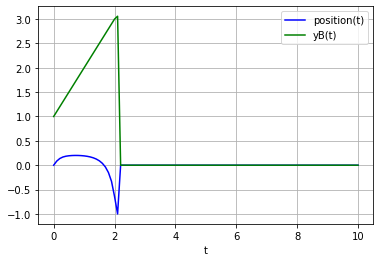

In [45]:
from matplotlib import pyplot as plt
plt.plot(t, sol[:, 0], 'b', label='position(t)')
plt.plot(t, sol[:, 2], 'g', label='yB(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()